In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

# pkl_name = 'symm_tilt_110_001_gbindex.pkl'
# jar = open(pkl_name, 'rb')
# s1 = pkl.load(jar,encoding='latin1')
# jar.close()

pkl_name = 'symm_tilt_110_001_energies.pkl'
jar = open(pkl_name, 'rb')
s2 = pkl.load(jar,encoding='latin1')
jar.close()

In [2]:
ngbs = len(s2)
gb_angs = np.zeros((ngbs, ))
gb_engs = np.zeros((ngbs, ))

for ct1 in range(ngbs):
    # gb_angs[ct1] = s1[0][ct1][0][2]
    gb_angs[ct1] = s2[ct1][0][0][2]
    gb_engs[ct1] = np.min(s2[ct1][2])

gb_angs = np.concatenate(([0], gb_angs, [180]))*np.pi/180
gb_engs = np.concatenate(([0], gb_engs, [0]))

In [3]:
cusp_ids = np.zeros((3, ))
cusp_ids[0] = 0
cusp_ids[1] = 29
cusp_ids[2] = 43
cusp_ids = cusp_ids.astype(int)
print(cusp_ids)

gb_angs_cusps = gb_angs[cusp_ids]
gb_engs_cusps = gb_engs[cusp_ids]
print(gb_angs_cusps)
print(gb_engs_cusps)

gb_cusps = {}
gb_cusps['angs'] = gb_angs_cusps
gb_cusps['engs'] = gb_engs_cusps


[ 0 29 43]
[0.         1.14262855 2.23111068]
[  0.          75.19372177 150.7627575 ]


In [4]:
symm_tilt_props = {}
symm_tilt_props['angs'] = gb_angs
symm_tilt_props['engs'] = gb_engs
symm_tilt_props['cusps'] = gb_cusps

jar = open('symm_angs_engs.pkl','wb')
pkl.dump(symm_tilt_props, jar)
jar.close()

(0.0, 65.46779328559106)

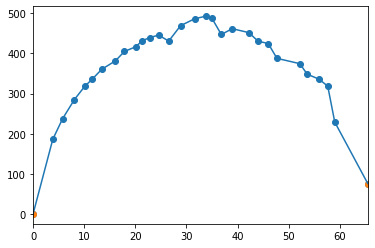

In [5]:
# plt.plot(gb_angs, gb_engs)
plt.scatter(gb_angs*180/np.pi, gb_engs)
plt.plot(gb_angs*180/np.pi, gb_engs)
plt.scatter(gb_angs_cusps*180/np.pi, gb_engs_cusps)
xlims=[gb_angs_cusps[0]*180/np.pi, gb_angs_cusps[1]*180/np.pi,gb_angs_cusps[2]*180/np.pi,np.pi*180/np.pi]
plt.xlim((xlims[0], xlims[1]))

In [6]:
def dist_th(th_var, th1, th_period):
    ## Account for periodicity
    th_var1 = (th_var%th_period)
    del1_th1 = (np.abs(th_var1 - th1))
    del2_th1 = (np.abs(th1 + th_period - th_var1))
    del_th1 = np.minimum(del1_th1, del2_th1)
    return del_th1

def func_val(del_th, dth1, a1, h1):
    y_val = 0*del_th
    nsz = np.size(del_th)
    for ct1 in range(nsz):
        dth = del_th[ct1]
        if dth == 0:
            y_val[ct1] = a1
        elif (dth <= dth1) and (dth > 0):
            dth_sc = dth/dth1
            y_val[ct1] = ((h1-a1)*(dth_sc)*(1 - np.log(dth_sc)) + a1)
        elif (dth > dth1):
            y_val[ct1] = h1
    return y_val

In [7]:
## Global Mean-Energy parameter
h = 400 ## mJ/m^2
## Randomly initialized to satisy the constraint h1*h2*h3 = h
h1 = h**(1.0/3.0)
h2 = h**(1.0/3.0)
h3 = h**(1.0/3.0)

## Cusp-1
ct1 = 0
th1 = gb_angs_cusps[ct1]
E1 = gb_engs_cusps[ct1] ## mJ/m^2
# Parameters
dth1 = 28.5*np.pi/180 ## degrees
a1 = E1/(h2*h3) ## a1*h2*h3 = E1

## Cusp-2
ct1 = 1
th2 = gb_angs_cusps[ct1]
E2 = gb_engs_cusps[ct1] ## mJ/m^2
# Parameters
dth2 = 25*np.pi/180
a2 = E2/(h1*h3) ## a2*h1*h3 = E2

## Cusp-3
ct1 = 2
th3 = gb_angs_cusps[ct1]
E3 = gb_engs_cusps[ct1] ## mJ/m^2
th3 = 127.83322536*np.pi/180
E3 = 150.7627575 ## mJ/m^2
# Parameters
dth3 = 25*np.pi/180
a3 = E3/(h1*h2) ## a3*h1*h2 = E3

print((th2-th1)*180/np.pi)
print((th3-th2)*180/np.pi)
# print([a1,h1])
# print([a2,h2])
# print([a3,h3])

65.46779328559106
62.365432074408936


(0.0, 65.46779328559106)

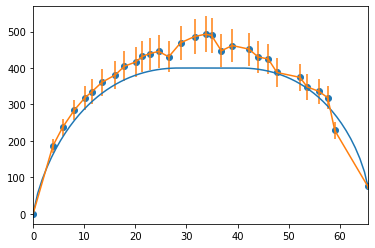

In [8]:
## Function w.r.to Cusp-1
th_var = np.linspace(0, np.pi, 201)
th_var = np.unique(np.sort(np.concatenate((th_var, gb_angs_cusps))))

del_th1 = dist_th(th_var, th1, np.pi)
eng_y1 = func_val(del_th1, dth1, a1, h1)
## Function w.r.to Cusp-2
del_th2 = dist_th(th_var, th2, np.pi)
eng_y2 = func_val(del_th2, dth2, a2, h2)
## Function w.r.to Cusp-3
del_th3 = dist_th(th_var, th3, np.pi)
eng_y3 = func_val(del_th3, dth3, a3, h3)
## Product Function
eng_y = eng_y1*eng_y2*eng_y3
# print(eng_y)
plt.plot(th_var*180/np.pi, eng_y)
plt.scatter(gb_angs*180/np.pi, gb_engs)
# plt.scatter(gb_angs_cusps*180/np.pi, gb_engs_cusps)
plt.errorbar(gb_angs*180/np.pi, gb_engs, yerr=gb_engs*0.1)
plt.xlim((xlims[0], xlims[1]))

(0.0, 65.46779328559106)

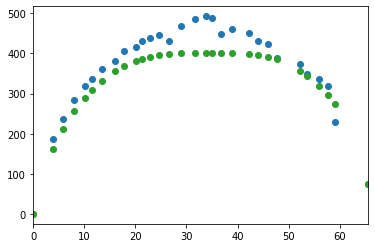

In [9]:
## Mean value function at the data-points
del_th1 = dist_th(gb_angs, th1, np.pi)
eng1_data = func_val(del_th1, dth1, a1, h1)

del_th2 = dist_th(gb_angs, th2, np.pi)
eng2_data = func_val(del_th2, dth2, a2, h2)

del_th3 = dist_th(gb_angs, th3, np.pi)
eng3_data = func_val(del_th3, dth3, a3, h3)

eng_data = eng1_data*eng2_data*eng3_data

plt.scatter(gb_angs*180/np.pi, gb_engs)
plt.scatter(gb_angs_cusps*180/np.pi, gb_engs_cusps)
plt.scatter(gb_angs*180/np.pi, eng_data)
plt.xlim((xlims[0], xlims[1]))

<ErrorbarContainer object of 3 artists>

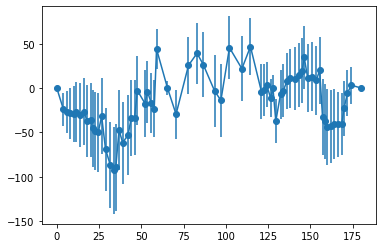

In [12]:
## Difference between data and mean-function evaluated at the data-points
plt.scatter(gb_angs*180/np.pi, eng_data-gb_engs)
plt.errorbar(gb_angs*180/np.pi, eng_data-gb_engs, yerr=gb_engs*0.1)
# plt.xlim((xlims[0], xlims[1]))

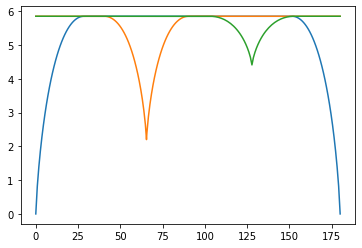

In [11]:
## Plot function w.r.to Cusps
plt.plot(th_var*180/np.pi, eng_y1)
plt.plot(th_var*180/np.pi, eng_y2)
plt.plot(th_var*180/np.pi, eng_y3)
# plt.plot(th_var*180/np.pi, eng_y)